# Subtract nuclei masks from cell masks to obtain cytoplasm


## Requirements
- A folder with segmented cells
- A folder with segmented nuclei

## Config

### The following code imports and declares functions used for the processing:

In [1]:
#################################
#  Don't modify the code below  #
#################################

import os
import re
import time
import numpy as np
import xarray as xr
import warnings
from tqdm import tqdm
from skimage import io
from scipy import ndimage
import matplotlib.pyplot as plt
from am_utils.utils import walk_dir, imsave


## Specify data paths and analysis parameters

### Please provide data paths and other parameters:

`nuclei_dir`: folder with segmented nuclei images

`cell_dir`: folder with segmented cell images with the same naming and the same number of images

`output_dir`: folder to save results

`match_labels`: set to `True` to relable nuclei to match cell labels

`base_label`: set to `nuclei` to use the nuclei segmentation as a basis for relabelling; set to `cell` to use cell segmentation as a basis for relabelling


In [2]:
nuclei_dir = "/research/sharedresources/cbi/public/data/example_data/cytoplasm_segmentation/2D/nuclei"
cell_dir = "/research/sharedresources/cbi/public/data/example_data/cytoplasm_segmentation/2D/cells"
output_dir = "/research/sharedresources/cbi/public/data/_outputs/cytoplasm_segmentation/2D"
match_labels = True

# nuclei_dir = "/research/sharedresources/cbi/public/data/example_data/cytoplasm_segmentation/3D/nuclei"
# cell_dir = "/research/sharedresources/cbi/public/data/example_data/cytoplasm_segmentation/3D/cells"
# output_dir = "/research/sharedresources/cbi/public/data/_outputs/cytoplasm_segmentation/3D"
# match_labels = True

### The following code lists all image files in the input directory:

In [3]:
#################################
#  Don't modify the code below  #
#################################

samples = walk_dir(nuclei_dir)

print(f'{len(samples)} images were found:')
print(np.array(samples))

1 images were found:
['/research/sharedresources/cbi/public/data/example_data/cytoplasm_segmentation/2D/nuclei/FluorescentCells.tif']


### The following code loads and displays a random pair of images

/apps/conda_envs/intake_io/lib/python3.8/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


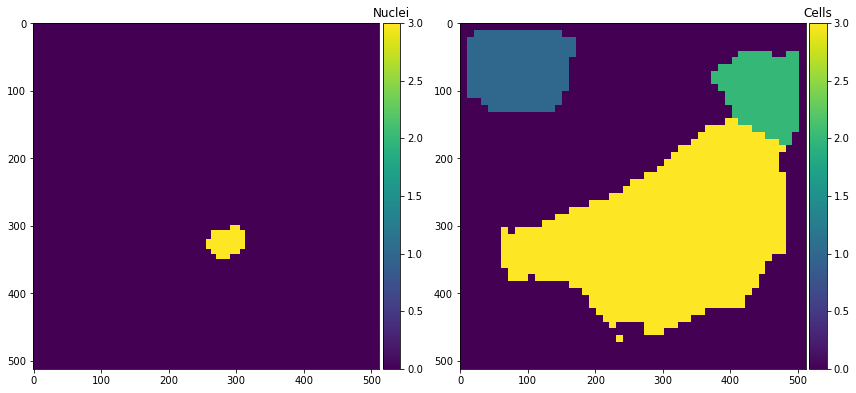

In [4]:
#################################
#  Don't modify the code below  #
#################################

sample = samples[np.random.randint(len(samples))]
nuclei = io.imread(sample)
cells = io.imread(sample.replace(nuclei_dir, cell_dir))
titles = ['Nuclei', 'Cells']
imgs = [nuclei, cells]

fig, axs = plt.subplots(1, 2, figsize=(12,6))
for i in range(len(titles)):
    plt.sca(axs[i])
    img = imgs[i]
    while len(img.shape) > 2:
        img = img.max(0)
    io.imshow(img)
    plt.title(titles[i])


### The following code processes the example image

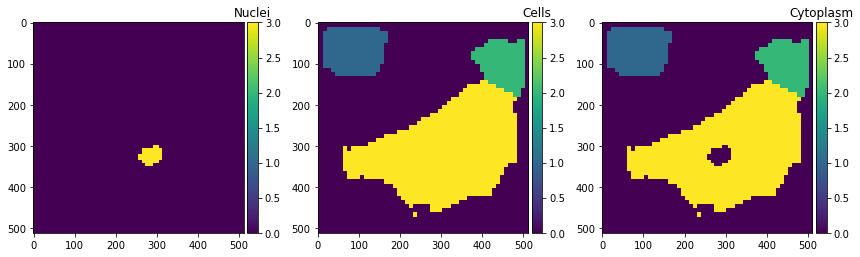

In [5]:
#################################
#  Don't modify the code below  #
#################################

# relable nuclei
if match_labels:
    nuclei = (nuclei > 0) * cells
        
# extract cytoplasm
cytoplasm  = cells * (nuclei == 0)
        
titles = ['Nuclei', 'Cells', 'Cytoplasm']
imgs = [nuclei, cells, cytoplasm]

fig, axs = plt.subplots(1, 3, figsize=(12,6))
for i in range(len(titles)):
    plt.sca(axs[i])
    img = imgs[i]
    while len(img.shape) > 2:
        img = img.max(0)
    io.imshow(img)
    plt.title(titles[i])

### The following code processes all images and saves the results: 

In [6]:
%%time
#################################
#  Don't modify the code below  #
#################################

for i, sample in tqdm(enumerate(samples)):
    sample = samples[np.random.randint(len(samples))]
    nuclei = io.imread(sample)
    
    # relable nuclei
    if match_labels:
        nuclei = (nuclei > 0) * cells
        imsave(sample, nuclei)

    # extract cytoplasm
    cytoplasm  = cells * (nuclei == 0)
    imsave(sample.replace(nuclei_dir, output_dir), cytoplasm)
    

1it [00:00, 26.63it/s]

CPU times: user 9.66 ms, sys: 5.22 ms, total: 14.9 ms
Wall time: 40.9 ms
